# RSU WELL

Machine learning models can extract patterns and relationships between different log measurements and permeability, 
allowing for the creation of accurate predictive models. However, selecting relevant features and pre-processing the
data can be critical for achieving good performance

## METHODOLOGY
The first step important step in constructing a reliable Machine learning model is data pre_porcessing or exploratory data analysis. EDA can help identify trends, patterns, and outliers in the data, and provide insights into the relationship between these parameters and well performance.

# PANDAS LIBRARY
One of the most essential libraries for exploratory data analysis in Python is Pandas. Pandas provides a fast, flexible, and easy-to-use data manipulation and analysis toolkit for Python. It allows you to read in a wide range of data formats, including CSV, Excel, lAS, SQL databases, and more. Pandas allows you to manipulate and explore the data in a variety of ways, including filtering, aggregating, pivoting, and visualizing data.

In [1]:
#IMPORTING THE PANDAS LIBRARY
import pandas as pd
#USING PANDAS TO READ THE RSU_WELL DATA
Well=pd.read_csv('RSU_WELL')
Well

,Depth,RHOB,GammaRay,Vp,Vs,Porosity,Facies
0,11148.5,2.696,143.284,18664.725535,11175.806614,0.100,1
1,11149.0,2.680,89.267,18682.509435,11125.945705,0.100,1
2,11149.5,2.667,63.850,18658.108814,11131.147176,0.238,1
3,11150.0,2.654,49.143,18745.196543,11245.305085,1.047,1
4,11150.5,2.646,37.462,18748.359519,11424.262849,1.533,1
...,...,...,...,...,...,...,...
2962,12629.5,2.767,18.392,21267.998043,11526.978894,4.738,5
2963,12630.0,2.796,14.815,21361.587593,11524.056468,3.636,5
2964,12630.5,2.796,11.907,21474.434686,11590.440205,3.611,5
2965,12631.0,2.769,10.082,21296.532924,11672.152578,4.564,5


In [2]:
Well.isna().sum()

Depth       0
RHOB        0
GammaRay    0
Vp          0
Vs          0
Porosity    0
Facies      0
dtype: int64

In [3]:
#USING NUMPY
#NUMPY LIBRARY IS ESSENTIAL FOR NUMERIACL COMPUTING
import numpy as np
#USING MATPLOTLIB & SEABORN LIBRARY TO CREATE PLOTS,DATA VIZUALIZATION AND STYLIZATION IN PYTHON.
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
Well.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2967 entries, 0 to 2966
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Depth     2967 non-null   float64
 1   RHOB      2967 non-null   float64
 2   GammaRay  2967 non-null   float64
 3   Vp        2967 non-null   float64
 4   Vs        2967 non-null   float64
 5   Porosity  2967 non-null   float64
 6   Facies    2967 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 162.4 KB


In [5]:
Well.describe()

,Depth,RHOB,GammaRay,Vp,Vs,Porosity,Facies
count,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000,2967.000000
mean,11890.000000,2.646541,41.134206,18957.260097,11410.914688,5.158134,3.022919
std,428.321725,0.095723,34.039048,1638.589487,742.150591,4.656194,1.195694
min,11148.500000,2.356000,5.082000,13709.334686,8072.262897,0.100000,1.000000
25%,11519.250000,2.569000,18.608000,17817.371943,11025.419112,1.415500,2.000000
50%,11890.000000,2.645000,35.547000,18510.291722,11550.411772,4.381000,3.000000
75%,12260.750000,2.723000,51.104500,20107.777688,11930.967474,7.629000,4.000000
max,12631.500000,2.861000,606.990000,23793.095244,14120.903173,26.807000,5.000000


    The Porosity distribution is positively skewed, indicating that the majority of samples had lower porosity values.

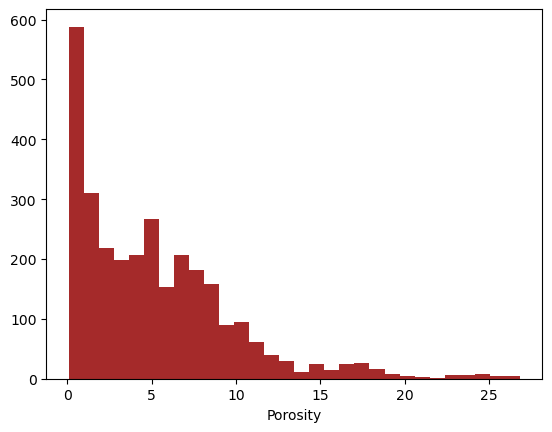

In [6]:
plt.hist(Well.Porosity,30,color='Brown');
plt.xlabel('Porosity');

In [7]:
Well=Well.drop('Depth',axis=1)

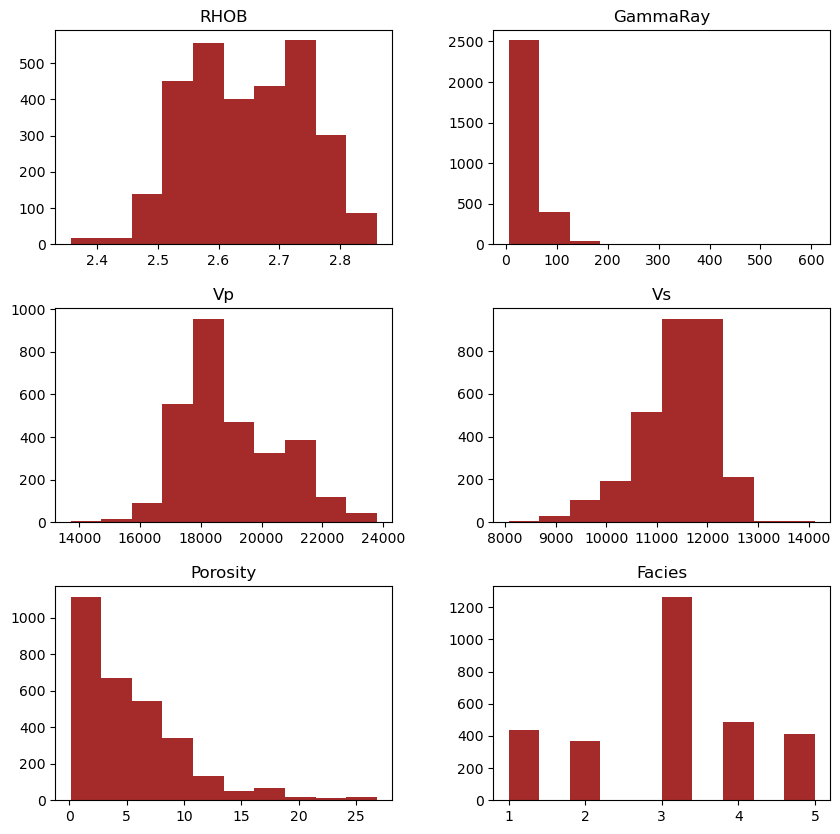

In [8]:
Well.hist(figsize=(10,10),grid=False,color='Brown');

In [9]:
Well=pd.read_csv('RSU_WELL')
Well.head()

,Depth,RHOB,GammaRay,Vp,Vs,Porosity,Facies
0,11148.5,2.696,143.284,18664.725535,11175.806614,0.100,1
1,11149.0,2.680,89.267,18682.509435,11125.945705,0.100,1
2,11149.5,2.667,63.850,18658.108814,11131.147176,0.238,1
3,11150.0,2.654,49.143,18745.196543,11245.305085,1.047,1
4,11150.5,2.646,37.462,18748.359519,11424.262849,1.533,1


In [10]:
# inp=['GammaRay','Porosity','Vp','Vs','RHOB']
# a=Well[inp].apply(stats.zscore)#apply the correct zcore..... where is  gamma ray
# #treat outlier before zscore
# a

# Creating a categorical data for facies in a column titled  'Lithofacies'

In [11]:
Well.Facies.dtypes

dtype('int64')

In [12]:
#Converting Facies column to string
Well['Facies']=Well['Facies'].values.astype('object')

In [13]:
#Using '1':"Shale", '2':"Limestone", '3':"Sandstone", '4':"HP Dolomite",'5':"LP Dolomite"
## map dictionary
Litho={1:"Shale", 2:"Limestone", 3:"Sandstone", 4:"HP_Dolomite",5:"LP_Dolomite"}
Well['Lithofacies']= Well['Facies'].map(Litho)

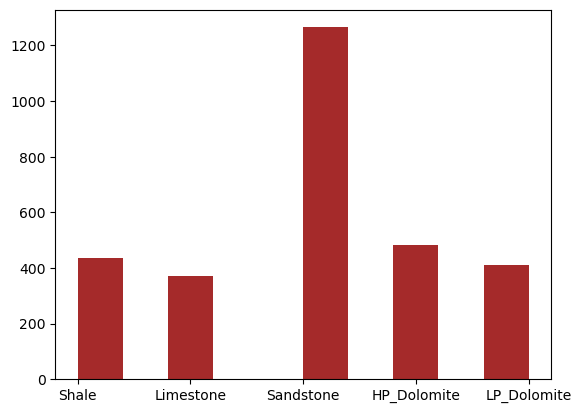

In [14]:
# Checking out what Lithofacies we have,Lithofacies is a categorical variable
plt.hist(Well.Lithofacies,color='Brown');

<AxesSubplot:xlabel='Porosity'>

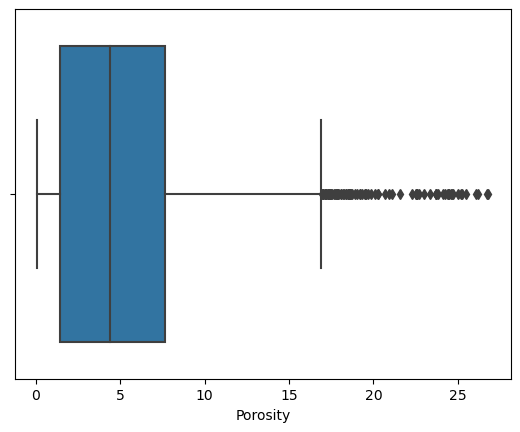

In [15]:
box=sns.boxplot(x=Well.Porosity)
box

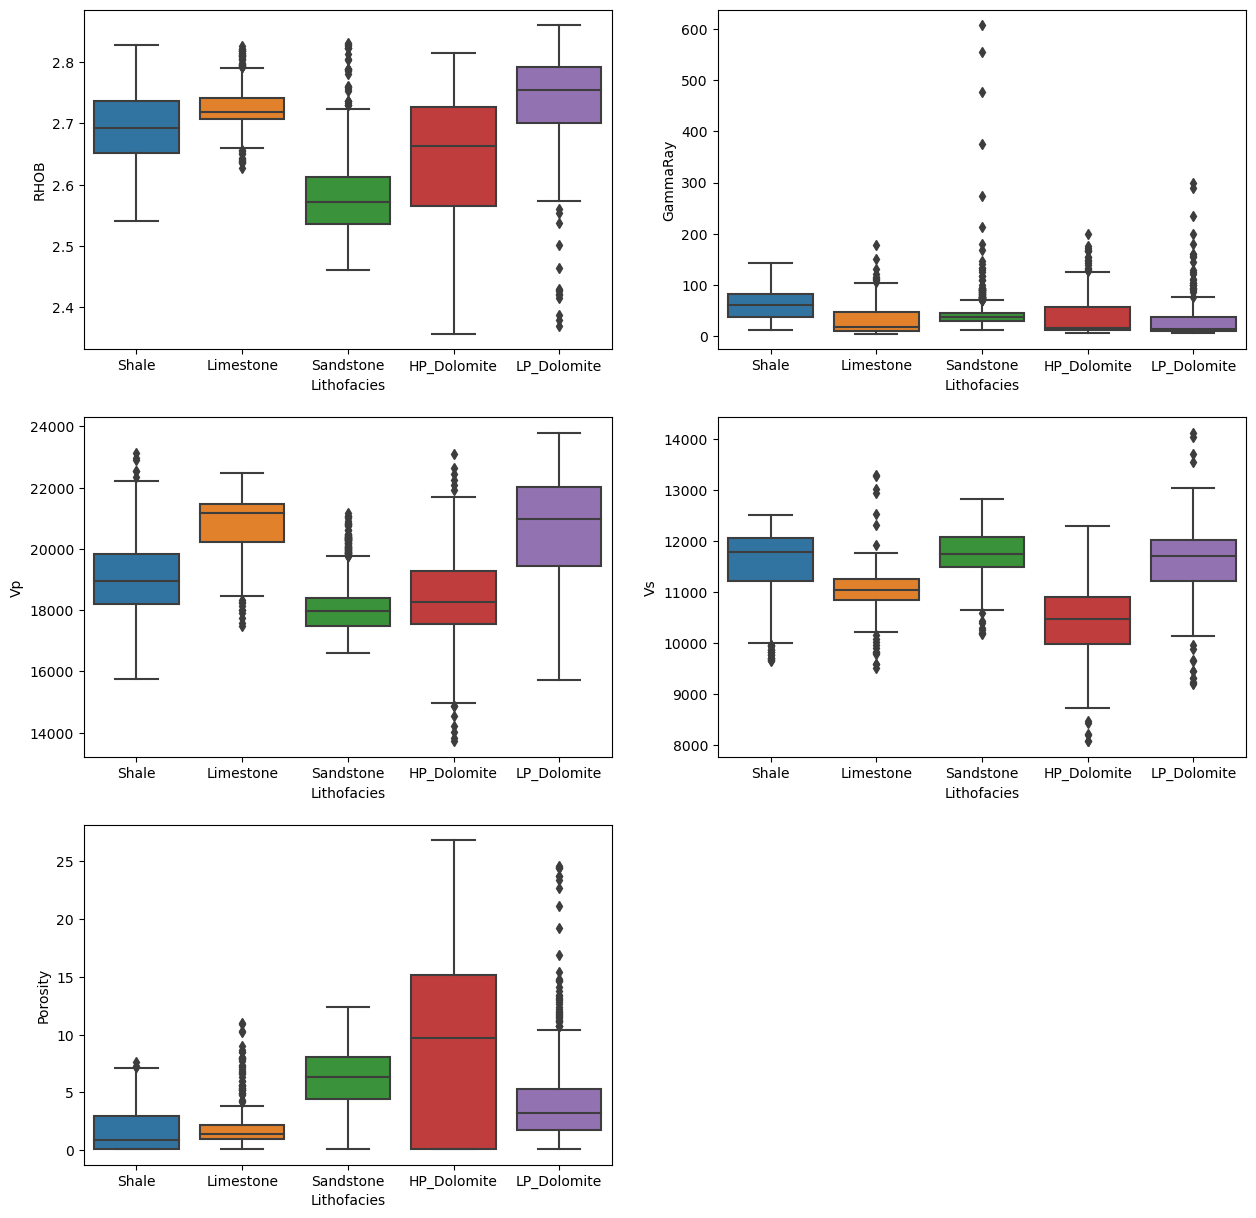

In [16]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
log_col=['RHOB','GammaRay','Vp','Vs','Porosity']
k=0
fig, ax= plt.subplots(3,2,figsize=(15,15))
try:
    for  i in range(3):
        for  j in range(2):
            sns.boxplot(x='Lithofacies',y=log_col[k], data=Well,ax=ax[i,j])
            k+=1
        divider = make_axes_locatable(ax[i,j])
        ax.flat[-1].set_visible(False)
except:
    print('')

In [17]:
Well=Well.loc[~((Well['Lithofacies']=='Sandstone') &(Well['GammaRay']>100))]
Well=Well.loc[~((Well['Lithofacies']=='Sandstone') &(Well['RHOB']>2.7))]
Well=Well.loc[~((Well['Lithofacies']=='LP_Dolomite') &(Well['RHOB']<2.5))]
Well=Well.loc[~((Well['Lithofacies']=='LP_Dolomite') &(Well['GammaRay']>100))]
Well=Well.loc[~((Well['Lithofacies']=='HP_Dolomite') &(Well['GammaRay']>100))]
Well=Well.loc[~((Well['Lithofacies']=='LP_Dolomite') &(Well['Porosity']>10))]
Well=Well.loc[~((Well['Lithofacies']=='LP_Dolomite') &(Well['Porosity']>10))]


In [18]:
Well.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2813 entries, 0 to 2966
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Depth        2813 non-null   float64
 1   RHOB         2813 non-null   float64
 2   GammaRay     2813 non-null   float64
 3   Vp           2813 non-null   float64
 4   Vs           2813 non-null   float64
 5   Porosity     2813 non-null   float64
 6   Facies       2813 non-null   object 
 7   Lithofacies  2813 non-null   object 
dtypes: float64(6), object(2)
memory usage: 197.8+ KB


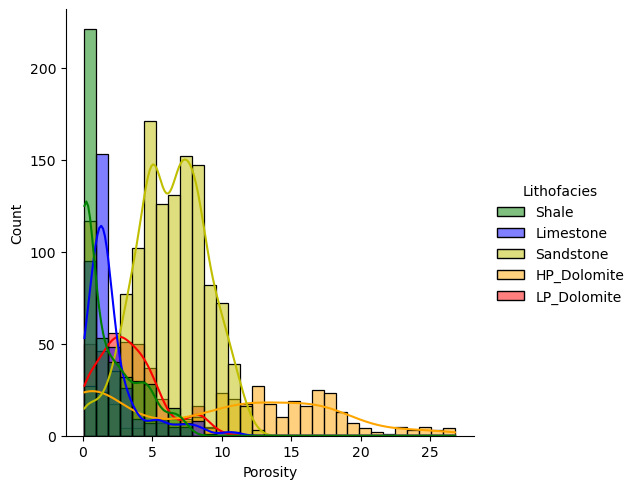

In [19]:
palette=['Green','b','y','Orange','r']

sns.displot(data=Well,x='Porosity',kde=True,hue='Lithofacies',palette=palette);

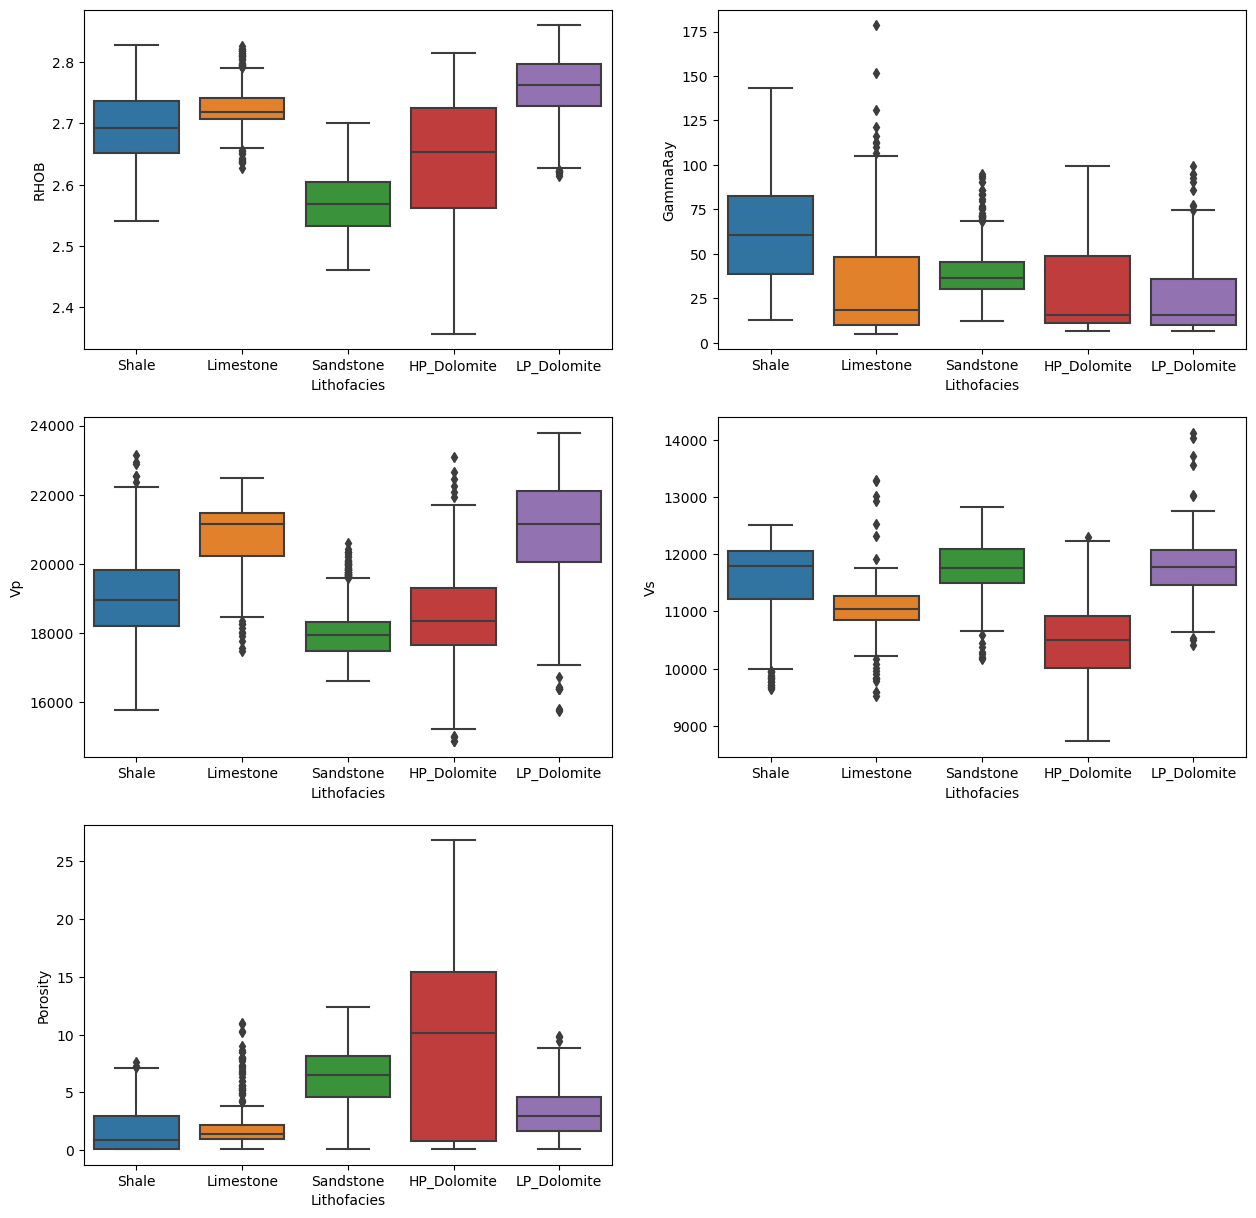

In [20]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
log_col=['RHOB','GammaRay','Vp','Vs','Porosity']
k=0
fig, ax= plt.subplots(3,2,figsize=(15,15))
try:
    for  i in range(3):
        for  j in range(2):
            sns.boxplot(x='Lithofacies',y=log_col[k], data=Well,ax=ax[i,j])
            k+=1
        divider = make_axes_locatable(ax[i,j])
        ax.flat[-1].set_visible(False)
except:
    print('')

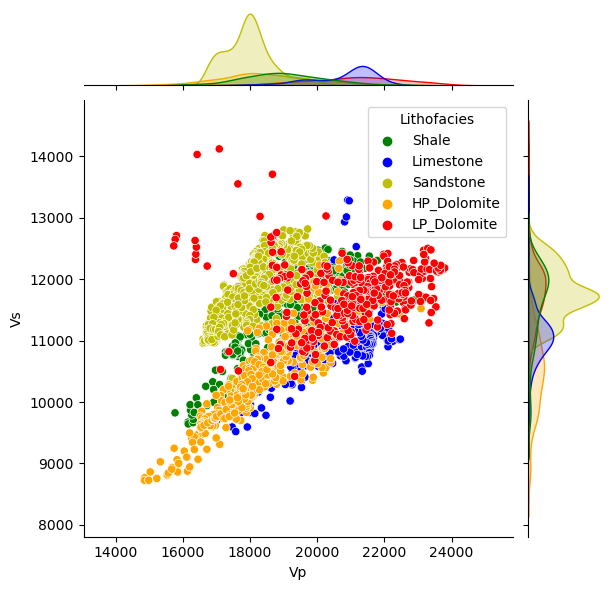

In [21]:
## Cross plot VP (acoutic velocity) and Vs (shear velocity) with Lithofacies
palette=['Green','b','y','Orange','r']
new=sns.jointplot(data=Well,hue='Lithofacies',x=Well.Vp,y=Well.Vs,palette=palette)
#HP MAGNETA
#WHY DO WE HAVE CORRELATION FOR THIS PLOT Vs & Vp
#What does this plot mean and why is it important to visualize?

Vp (P-wave velocity) and Vs (S-wave velocity) are both measures of how fast seismic waves travel through a rock, but they are sensitive to different properties of the rock. Vp is primarily influenced by the rock's bulk modulus (how resistant it is to compression), while Vs is primarily influenced by the rock's shear modulus (how resistant it is to deformation).

Using lithofacies as a hue for the seaborn jointplot can provide additional insight into the relationship between lithofacies and seismic velocity data, and can help geoscientists identify patterns and trends in the data.

In [22]:
import seaborn as sns
log_cols=['RHOB', 'GammaRay', 'Vp', 'Vs','Lithofacies']

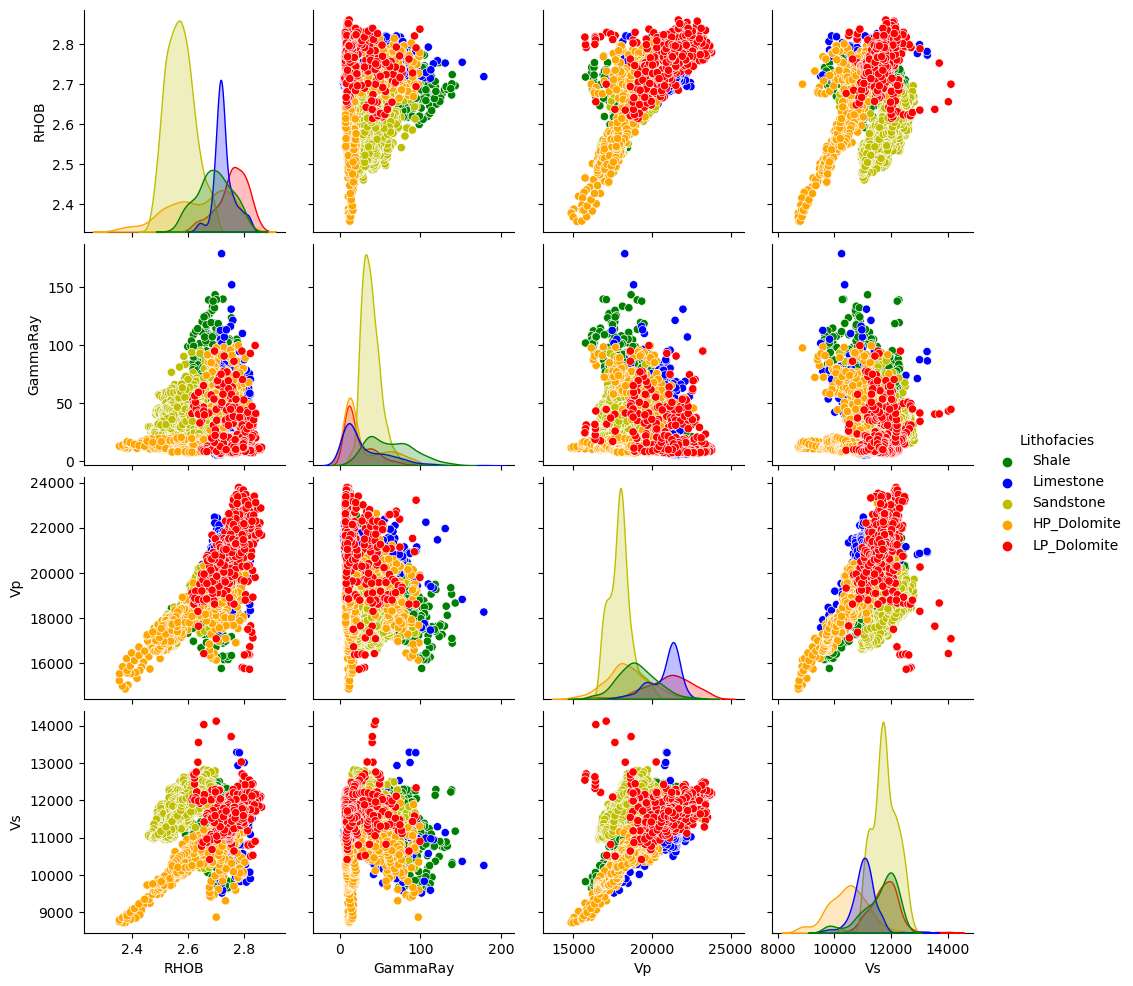

In [23]:
sns.pairplot(data=Well[log_cols],hue='Lithofacies',palette=palette)
#This should come after the crossplot...

# CORRELATION

In [24]:
Well.columns

Index(['Depth', 'RHOB', 'GammaRay', 'Vp', 'Vs', 'Porosity', 'Facies',
       'Lithofacies'],
      dtype='object')

In [25]:
Well_logs=['RHOB', 'GammaRay', 'Vp', 'Vs', 'Porosity','Lithofacies']

In [26]:
Well[Well_logs].corr()

,RHOB,GammaRay,Vp,Vs,Porosity
RHOB,1.000000,0.118844,0.804301,0.106716,-0.734378
GammaRay,0.118844,1.000000,-0.219244,-0.003217,-0.428084
Vp,0.804301,-0.219244,1.000000,0.244746,-0.535681
Vs,0.106716,-0.003217,0.244746,1.000000,-0.405136
Porosity,-0.734378,-0.428084,-0.535681,-0.405136,1.000000


In [27]:
correlation=round(Well[Well_logs].corr(),2)

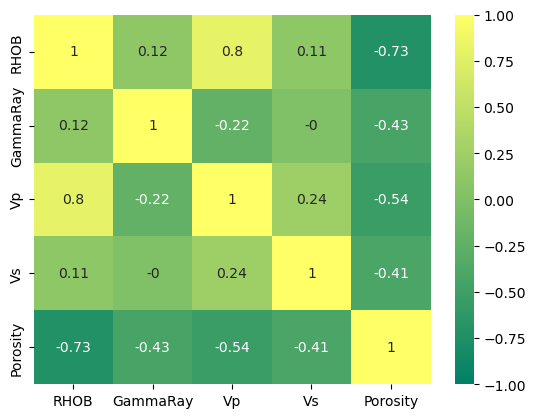

In [28]:
sns.heatmap(correlation,vmin=-1,vmax=1,center=0,annot=True,cmap='summer');

# Applying Random Forest Regressor to Predict POROSITY**

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.model_selection import cross_val_score



In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd


# separate features and target
X = Well[['RHOB', 'GammaRay', 'Vp', 'Vs']]
y = Well['Porosity']

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=4)

# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize random forest regressor model
rf_model = RandomForestRegressor(n_estimators=100,random_state=4)

# fit the model on training data
rf_model.fit(X_train, y_train)

# make predictions on test data
y_pred = rf_model.predict(X_test)

# evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("R-squared:", r2)

Mean squared error: 1.3099150807460036
Mean absolute error: 0.7535494138543517
R-squared: 0.9320532873499109


In [31]:
rf_model.score(X_test,y_test)

0.9320532873499109

In [32]:
y_test.mean()

4.795193605683831

In [33]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf_model, X_train, y_train, cv=5)
cvs

array([0.94554085, 0.95008722, 0.93777936, 0.94884279, 0.92811569])

In [34]:
np.mean(cvs)

0.942073183155301

# Comparing SVM AND RANDOM FOREST REGRESSOR

In [35]:
# import necessary libraries
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

# initialize models
svr = SVR()
rfr = RandomForestRegressor()

# train and evaluate SVR model
svr_scores = cross_val_score(svr, X_train, y_train, cv=5, scoring='r2')
svr_mean_score = np.mean(svr_scores)
print("SVR mean R-squared score:", svr_mean_score)

# train and evaluate RFR model
rfr_scores = cross_val_score(rfr, X_train, y_train, cv=5, scoring='r2')
rfr_mean_score = np.mean(rfr_scores)
print("RFR mean R-squared score:", rfr_mean_score)

# fit the best model on the entire training set
if svr_mean_score > rfr_mean_score:
    best_model = svr.fit(X_train, y_train)
    print("SVR was the best model with R-squared score:", svr_mean_score)
else:
    best_model = rfr.fit(X_train, y_train)
    print("RFR was the best model with R-squared score:", rfr_mean_score)

# evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Test set mean squared error:", mse)
print("Test set mean absolute error:", mae)
print("Test set R-squared:", r2)


SVR mean R-squared score: 0.9110785574982533
RFR mean R-squared score: 0.9431968906580555
RFR was the best model with R-squared score: 0.9431968906580555
Test set mean squared error: 1.2901241799824157
Test set mean absolute error: 0.7527216518650088
Test set R-squared: 0.933079862787537


In [36]:
from scipy import stats

Training correlation= 99.63%


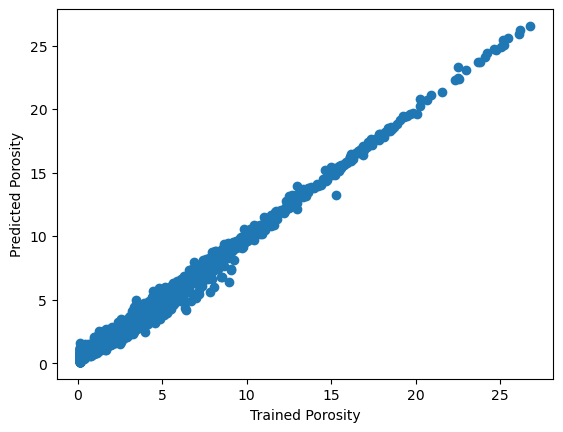

In [37]:
Porosity_predict_train=rfr.predict(X_train)
plt.scatter(y_train,Porosity_predict_train)
plt.xlabel('Trained Porosity')
plt.ylabel('Predicted Porosity')
slope, intercept, r_value, p_value, std_err = stats.linregress(y_train,Porosity_predict_train)
print(f"Training correlation= {round(100*r_value,2)}%")


Validation correlation= 96.63%


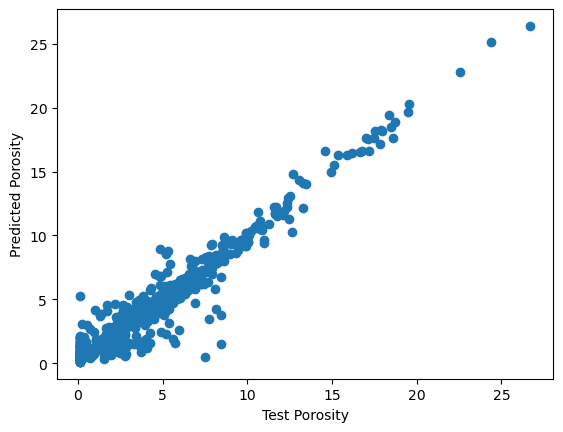

In [38]:
Porosity_predict_test=rfr.predict(X_test)
plt.scatter(y_test,Porosity_predict_test)
plt.xlabel('Test Porosity')
plt.ylabel('Predicted Porosity')
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,Porosity_predict_test)
print(f"Validation correlation= {round(100*r_value,2)}%")

In [39]:
# from sklearn.linear_model import Ridge
# np.random.seed(100)

# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
# model=Ridge()
# model.fit(X_train,y_train)
# print(f'{round(model.score(X_test,y_test)*100,2)}%')

# RANDOM FOREST CLASSIFIER

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score


In [41]:
# Assuming 'lithofacies' is the name of the column to be encoded
le = LabelEncoder()
Well['lithofacies_encoded'] = le.fit_transform(Well['Lithofacies'])
X= Well[['RHOB', 'GammaRay', 'Vp', 'Vs','Porosity']]

y=Well['lithofacies_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rfc = RandomForestClassifier(random_state=2)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=2)

In [49]:
print(le.classes_)

['HP_Dolomite' 'LP_Dolomite' 'Limestone' 'Sandstone' 'Shale']


In [42]:
rfc.score(X_test,y_test)

0.8684834123222749

In [43]:
score=np.mean(cross_val_score(rfc, X_train, y_train))
score

0.8532271605895042

In [44]:
## Generarte a classification report
y_true, y_pred = y_test , rfc.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.85      0.78      0.82       148
           1       0.78      0.83      0.81       109
           2       0.90      0.86      0.88       114
           3       0.94      0.98      0.96       334
           4       0.75      0.72      0.73       139

    accuracy                           0.87       844
   macro avg       0.84      0.84      0.84       844
weighted avg       0.87      0.87      0.87       844



 Here is an explanation of the different metrics presented in the report:

Precision: Precision is the ratio of true positives to the sum of true positives and false positives for each class. It measures how often the model correctly identifies instances of a given class. For example, the precision for Sandstone is 0.94, which means that out of all instances the model predicted as Sandstone, 94% were actually Sandstone.

Recall: Recall is the ratio of true positives to the sum of true positives and false negatives for each class. It measures how often the model correctly identifies all instances of a given class. For example, the recall for Sandstone is 0.98, which means that out of all actual Sandstone instances in the test set, the model correctly identified 96%.

F1-score: The F1-score is the harmonic mean of precision and recall for each class. It provides a single score that balances precision and recall. For example, the F1-score for Sandstone is 0.96, which is a good score, indicating that the model is performing well in predicting Sandstone.

Support: Support is the number of instances of each class in the test set. For example, there are 441 instances of Sandstone in the test set.

Accuracy: The accuracy is the proportion of correct predictions out of all predictions for all classes. In this case, the accuracy is 0.87, which means that the model correctly classified 87% of all instances in the test set.

The macro average and weighted average in the report provide an overall evaluation of the model's performance. The macro average is the unweighted mean of the precision, recall, and F1-score for all classes, while the weighted average is the weighted mean of these metrics, weighted by the number of instances of each class in the test set. In this case, both the macro and weighted averages are close to the accuracy score, which indicates that the model is performing consistently across all classes.

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print('Confusion Matrix','\n',cm)
cm_cols_sum = cm.sum(axis=0)
print('\n','Sum of Columns','\n',cm_cols_sum)
n_cm = cm / cm_cols_sum
print('\n','Normalized Columns','\n',n_cm)

Confusion Matrix 
 [[116   8   9   0  15]
 [  4  91   1   2  11]
 [  9   4  98   0   3]
 [  0   1   0 328   5]
 [  7  12   1  19 100]]

 Sum of Columns 
 [136 116 109 349 134]

 Normalized Columns 
 [[0.85294118 0.06896552 0.08256881 0.         0.1119403 ]
 [0.02941176 0.78448276 0.00917431 0.00573066 0.08208955]
 [0.06617647 0.03448276 0.89908257 0.         0.02238806]
 [0.         0.00862069 0.         0.93982808 0.03731343]
 [0.05147059 0.10344828 0.00917431 0.05444126 0.74626866]]


For example, the first row shows the actual instances that belong to the "HP Dolomite" class. The model predicted that 116 of these instances belonged to the "HP Dolomite" class, 4 were predicted as "LP Dolomite", 9 as "Limestone", 0 as "Sandstone", and 7 as "Shale".

The confusion matrix provides a useful summary of the performance of the classification model and can be used to calculate various evaluation metrics such as precision, recall, and F1 score.

Text(50.72222222222221, 0.5, 'Predicted')

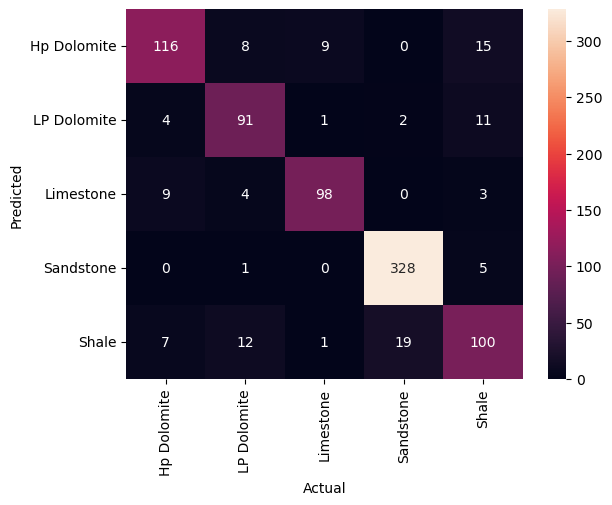

In [46]:
import seaborn as sns
sns.heatmap(cm,annot=True,  xticklabels=['Hp Dolomite','LP Dolomite','Limestone','Sandstone','Shale'],
            yticklabels=['Hp Dolomite','LP Dolomite','Limestone','Sandstone','Shale'],fmt='.0f');
plt.xlabel("Actual")
plt.ylabel("Predicted")

Text(50.72222222222221, 0.5, 'Predicted')

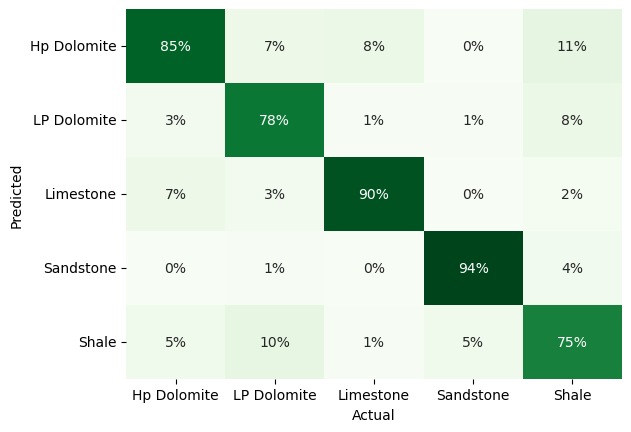

In [47]:
import seaborn as sns
cm_cols_sum = cm.sum(axis=0)
n_cm = cm / cm_cols_sum
#sns.set(font_scale=1.2)
sns.heatmap(n_cm, annot=True,fmt='.0%',cmap='Greens',cbar=False, xticklabels=['Hp Dolomite','LP Dolomite','Limestone','Sandstone','Shale'],
            yticklabels=['Hp Dolomite','LP Dolomite','Limestone','Sandstone','Shale'])
plt.xlabel("Actual")
plt.ylabel("Predicted")

In [48]:
 Well

,Depth,RHOB,GammaRay,Vp,Vs,Porosity,Facies,Lithofacies,lithofacies_encoded
0,11148.5,2.696,143.284,18664.725535,11175.806614,0.100,1,Shale,4
1,11149.0,2.680,89.267,18682.509435,11125.945705,0.100,1,Shale,4
2,11149.5,2.667,63.850,18658.108814,11131.147176,0.238,1,Shale,4
3,11150.0,2.654,49.143,18745.196543,11245.305085,1.047,1,Shale,4
4,11150.5,2.646,37.462,18748.359519,11424.262849,1.533,1,Shale,4
...,...,...,...,...,...,...,...,...,...
2962,12629.5,2.767,18.392,21267.998043,11526.978894,4.738,5,LP_Dolomite,1
2963,12630.0,2.796,14.815,21361.587593,11524.056468,3.636,5,LP_Dolomite,1
2964,12630.5,2.796,11.907,21474.434686,11590.440205,3.611,5,LP_Dolomite,1
2965,12631.0,2.769,10.082,21296.532924,11672.152578,4.564,5,LP_Dolomite,1
